In [1]:
# Block 1: Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

# Set up plotting style for better visualization
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("🔬 Lab Exercise VI – Dynamic Time Warping (DTW)")
print("=" * 55)

🔬 Lab Exercise VI – Dynamic Time Warping (DTW)


In [2]:
# Block 2: Define the given vectors
vector1 = np.array([2, 3, 4, 6, 8, 7, 6, 5, 4, 3, 2])
vector2 = np.array([2, 4, 6, 7, 7, 6, 5, 5, 4, 3, 2, 2, 1])

print("Vector 1:", vector1)
print("Vector 2:", vector2)
print(f"Vector 1 length: {len(vector1)} samples")
print(f"Vector 2 length: {len(vector2)} samples")
print(f"Vector 1 shape: {vector1.shape}")
print(f"Vector 2 shape: {vector2.shape}")

Vector 1: [2 3 4 6 8 7 6 5 4 3 2]
Vector 2: [2 4 6 7 7 6 5 5 4 3 2 2 1]
Vector 1 length: 11 samples
Vector 2 length: 13 samples
Vector 1 shape: (11,)
Vector 2 shape: (13,)


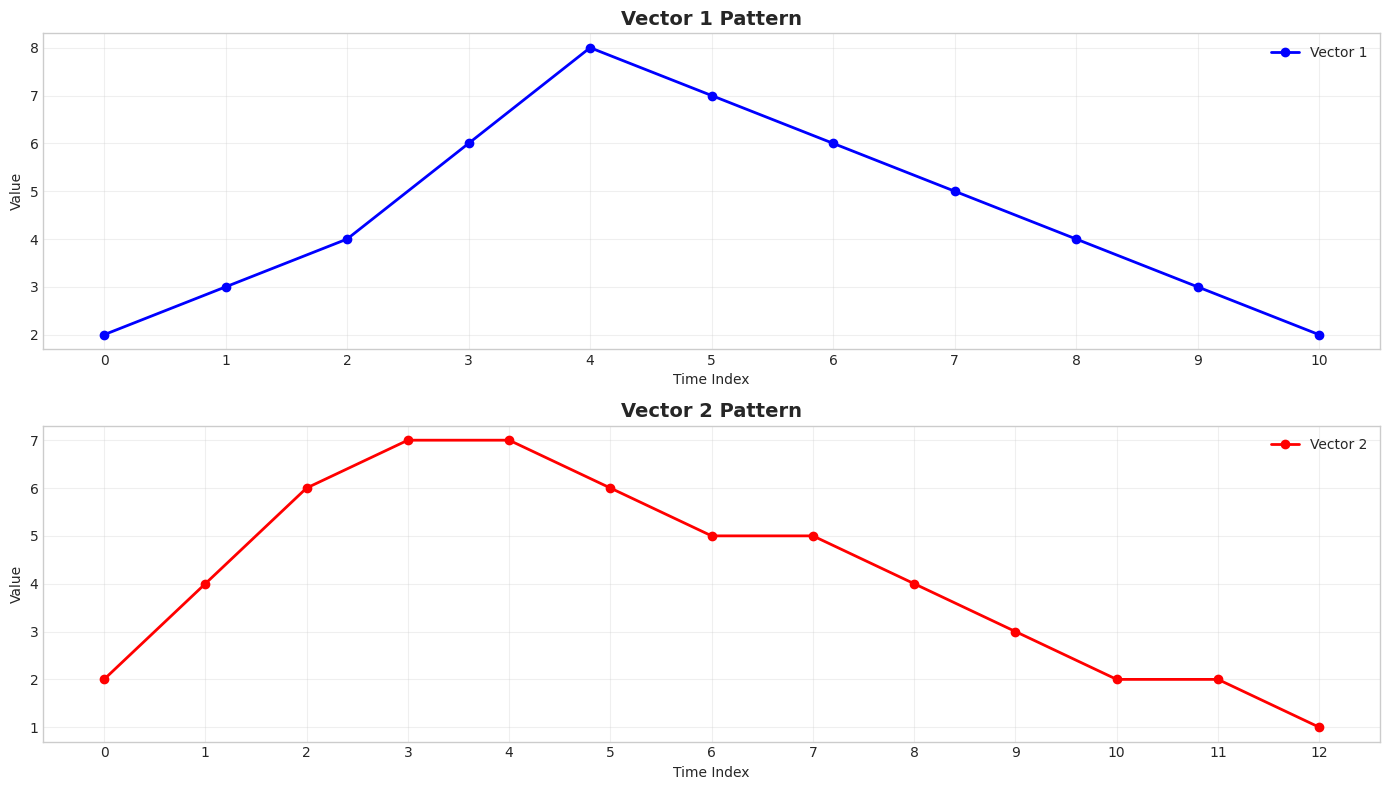

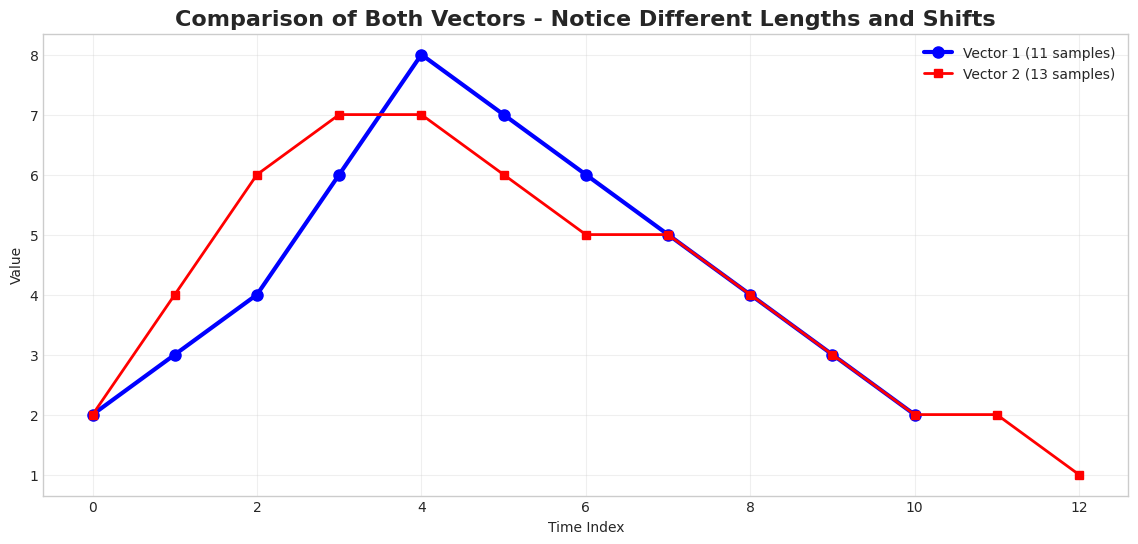

In [3]:
# Block 3: Plot both vectors to visualize their patterns
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))

# Plot Vector 1
ax1.plot(vector1, 'o-', linewidth=2, markersize=6, label='Vector 1', color='blue')
ax1.set_title('Vector 1 Pattern', fontsize=14, fontweight='bold')
ax1.set_xlabel('Time Index')
ax1.set_ylabel('Value')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_xticks(range(len(vector1)))

# Plot Vector 2
ax2.plot(vector2, 'o-', linewidth=2, markersize=6, label='Vector 2', color='red')
ax2.set_title('Vector 2 Pattern', fontsize=14, fontweight='bold')
ax2.set_xlabel('Time Index')
ax2.set_ylabel('Value')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_xticks(range(len(vector2)))

plt.tight_layout()
plt.show()

# Comparative plot
plt.figure(figsize=(14, 6))
plt.plot(vector1, 'o-', linewidth=3, markersize=8, label=f'Vector 1 ({len(vector1)} samples)', color='blue')
plt.plot(vector2, 's-', linewidth=2, markersize=6, label=f'Vector 2 ({len(vector2)} samples)', color='red')
plt.title('Comparison of Both Vectors - Notice Different Lengths and Shifts', fontsize=16, fontweight='bold')
plt.xlabel('Time Index')
plt.ylabel('Value')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

In [4]:
# Block 4: Implement Dynamic Time Warping algorithm
def dtw_distance(x, y):
    """
    Compute Dynamic Time Warping distance between two sequences
    
    Parameters:
    x, y: numpy arrays of the two sequences
    
    Returns:
    distance: DTW distance
    cost_matrix: accumulated cost matrix
    path: optimal warping path
    """
    n = len(x)
    m = len(y)
    
    # Initialize cost matrix with infinity
    cost_matrix = np.full((n, m), np.inf)
    
    # Compute local cost matrix (Euclidean distance)
    for i in range(n):
        for j in range(m):
            cost_matrix[i, j] = (x[i] - y[j]) ** 2
    
    # Initialize accumulated cost matrix
    acc_cost_matrix = np.full((n, m), np.inf)
    acc_cost_matrix[0, 0] = cost_matrix[0, 0]
    
    # Fill the first column
    for i in range(1, n):
        acc_cost_matrix[i, 0] = cost_matrix[i, 0] + acc_cost_matrix[i-1, 0]
    
    # Fill the first row
    for j in range(1, m):
        acc_cost_matrix[0, j] = cost_matrix[0, j] + acc_cost_matrix[0, j-1]
    
    # Fill the rest of the matrix
    for i in range(1, n):
        for j in range(1, m):
            acc_cost_matrix[i, j] = cost_matrix[i, j] + min(
                acc_cost_matrix[i-1, j],    # insertion
                acc_cost_matrix[i, j-1],    # deletion  
                acc_cost_matrix[i-1, j-1]   # match
            )
    
    # Backtrack to find optimal path
    path = []
    i, j = n-1, m-1
    path.append((i, j))
    
    while i > 0 or j > 0:
        if i == 0:
            j -= 1
        elif j == 0:
            i -= 1
        else:
            min_val = min(
                acc_cost_matrix[i-1, j],
                acc_cost_matrix[i, j-1],
                acc_cost_matrix[i-1, j-1]
            )
            if acc_cost_matrix[i-1, j-1] == min_val:
                i -= 1
                j -= 1
            elif acc_cost_matrix[i-1, j] == min_val:
                i -= 1
            else:
                j -= 1
        path.append((i, j))
    
    path.reverse()
    distance = acc_cost_matrix[n-1, m-1]
    
    return distance, acc_cost_matrix, path

print("Computing DTW distance...")
dtw_dist, cost_matrix, warping_path = dtw_distance(vector1, vector2)
print("✅ DTW computation completed!")

Computing DTW distance...
✅ DTW computation completed!


In [5]:
# Block 5: Display DTW results and cost matrix
print("\n📊 DTW Results:")
print("=" * 40)
print(f"DTW Distance: {dtw_dist:.4f}")
print(f"Square Root of DTW Distance: {np.sqrt(dtw_dist):.4f}")
print(f"Warping Path Length: {len(warping_path)} points")
print(f"\nWarping Path (first 10 points): {warping_path[:10]}")
print(f"Warping Path (last 10 points): {warping_path[-10:]}")

print(f"\nCost Matrix Shape: {cost_matrix.shape}")
print("Cost Matrix (first 5x5):")
print(cost_matrix[:5, :5].round(3))


📊 DTW Results:
DTW Distance: 3.0000
Square Root of DTW Distance: 1.7321
Warping Path Length: 14 points

Warping Path (first 10 points): [(0, 0), (1, 0), (2, 1), (3, 2), (4, 3), (5, 4), (6, 5), (7, 6), (7, 7), (8, 8)]
Warping Path (last 10 points): [(4, 3), (5, 4), (6, 5), (7, 6), (7, 7), (8, 8), (9, 9), (10, 10), (10, 11), (10, 12)]

Cost Matrix Shape: (11, 13)
Cost Matrix (first 5x5):
[[ 0.  4. 20. 45. 70.]
 [ 1.  1. 10. 26. 42.]
 [ 5.  1.  5. 14. 23.]
 [21.  5.  1.  2.  3.]
 [57. 21.  5.  2.  3.]]


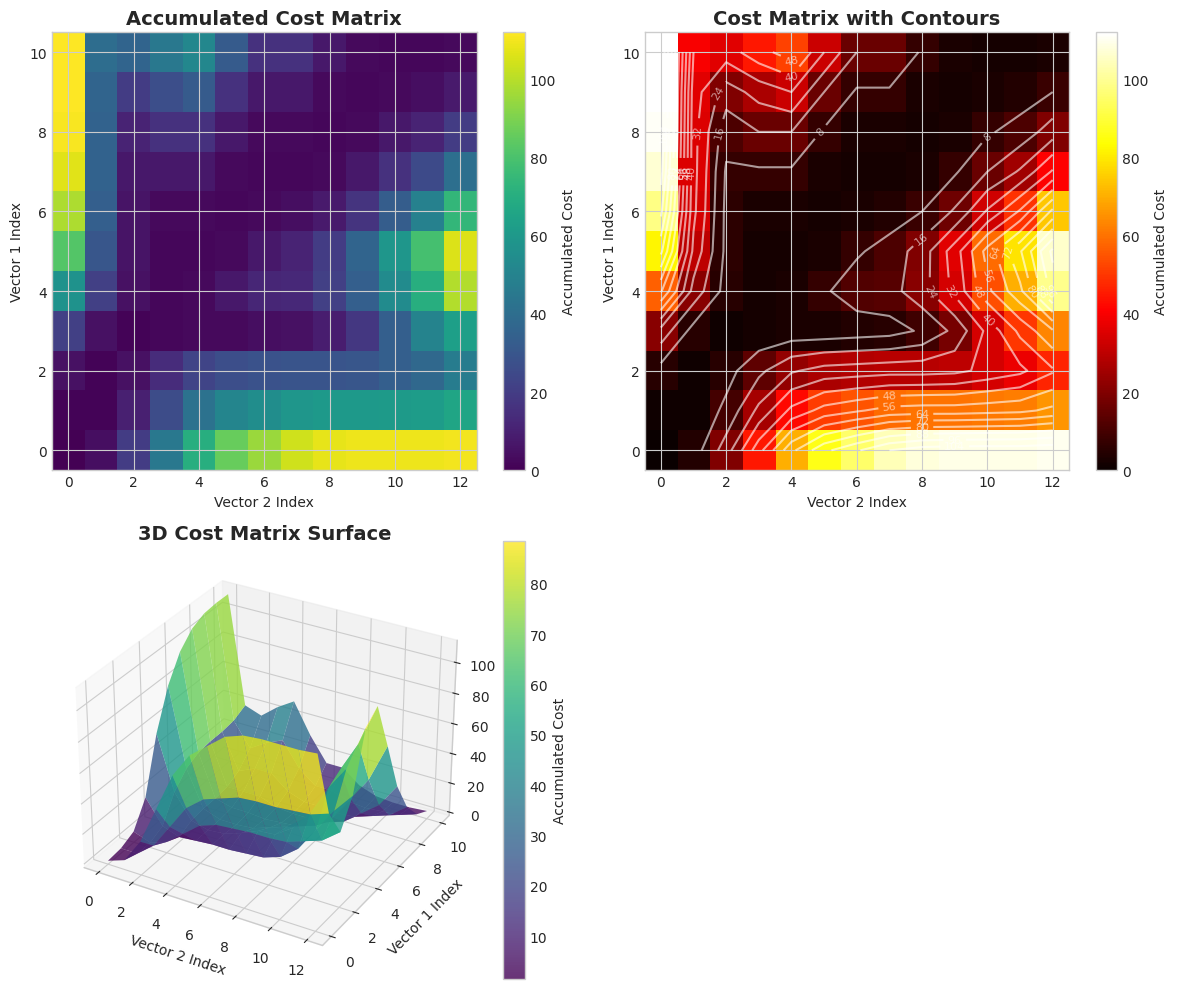

In [6]:
# Block 6: Visualize the accumulated cost matrix
plt.figure(figsize=(12, 10))

# Plot cost matrix as heatmap
plt.subplot(2, 2, 1)
im = plt.imshow(cost_matrix, cmap='viridis', aspect='auto', origin='lower')
plt.colorbar(im, label='Accumulated Cost')
plt.xlabel('Vector 2 Index')
plt.ylabel('Vector 1 Index')
plt.title('Accumulated Cost Matrix', fontsize=14, fontweight='bold')

# Plot cost matrix with contour
plt.subplot(2, 2, 2)
contour = plt.contour(cost_matrix, levels=15, colors='white', alpha=0.6)
plt.clabel(contour, inline=True, fontsize=8)
im = plt.imshow(cost_matrix, cmap='hot', aspect='auto', origin='lower')
plt.colorbar(im, label='Accumulated Cost')
plt.xlabel('Vector 2 Index')
plt.ylabel('Vector 1 Index')
plt.title('Cost Matrix with Contours', fontsize=14, fontweight='bold')

# Plot 3D surface of cost matrix
plt.subplot(2, 2, 3, projection='3d')
X, Y = np.meshgrid(range(len(vector2)), range(len(vector1)))
surf = plt.gca().plot_surface(X, Y, cost_matrix, cmap='viridis', 
                             alpha=0.8, linewidth=0, antialiased=True)
plt.colorbar(surf, label='Accumulated Cost')
plt.xlabel('Vector 2 Index')
plt.ylabel('Vector 1 Index')
plt.title('3D Cost Matrix Surface', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

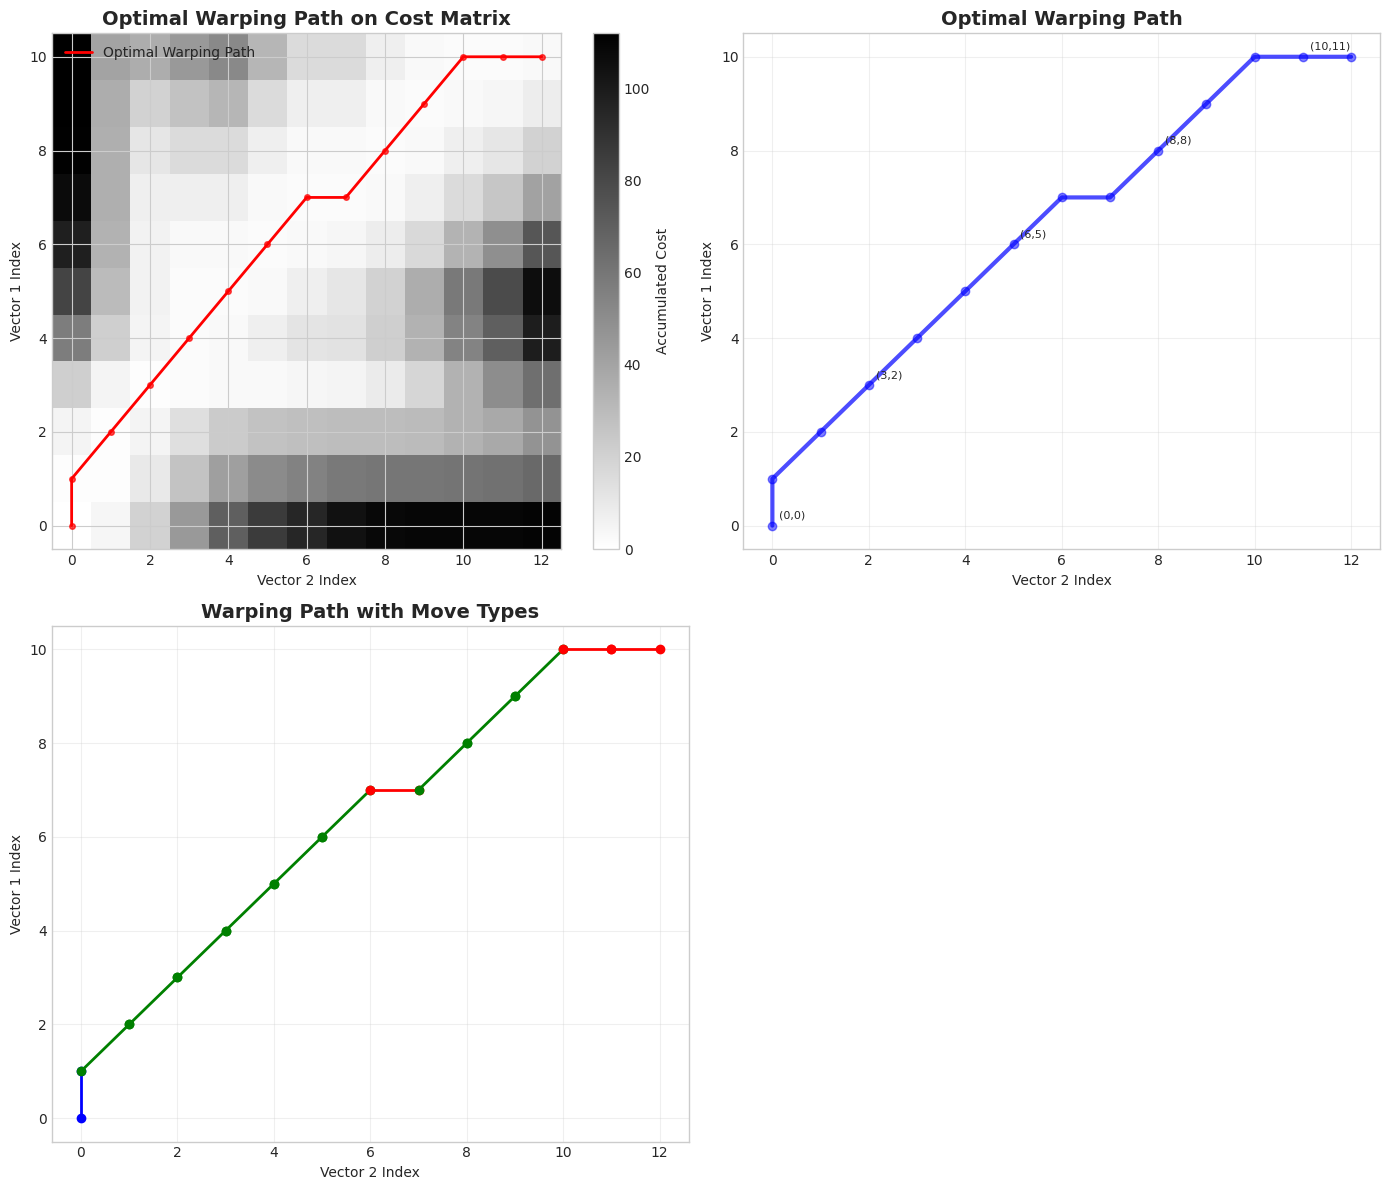

In [7]:
# Block 7: Visualize the optimal warping path
plt.figure(figsize=(14, 12))

# Plot 1: Warping path on cost matrix
plt.subplot(2, 2, 1)
im = plt.imshow(cost_matrix, cmap='gray_r', aspect='auto', origin='lower')
plt.colorbar(im, label='Accumulated Cost')

# Extract path coordinates
path_x = [point[1] for point in warping_path]
path_y = [point[0] for point in warping_path]

plt.plot(path_x, path_y, 'r-', linewidth=2, label='Optimal Warping Path')
plt.plot(path_x, path_y, 'ro', markersize=4, alpha=0.7)
plt.xlabel('Vector 2 Index')
plt.ylabel('Vector 1 Index')
plt.title('Optimal Warping Path on Cost Matrix', fontsize=14, fontweight='bold')
plt.legend()

# Plot 2: Warping path alone
plt.subplot(2, 2, 2)
plt.plot(path_x, path_y, 'b-', linewidth=3, alpha=0.7)
plt.plot(path_x, path_y, 'bo', markersize=6, alpha=0.5)
plt.xlabel('Vector 2 Index')
plt.ylabel('Vector 1 Index')
plt.title('Optimal Warping Path', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Annotate some key points
for i, (x, y) in enumerate(zip(path_x, path_y)):
    if i % 3 == 0:  # Annotate every 3rd point to avoid clutter
        plt.annotate(f'({y},{x})', (x, y), textcoords="offset points", 
                    xytext=(5,5), ha='left', fontsize=8)

# Plot 3: Warping path with step visualization
plt.subplot(2, 2, 3)
for i in range(len(warping_path)-1):
    x1, y1 = warping_path[i]
    x2, y2 = warping_path[i+1]
    
    # Different colors for different move types
    if x2 == x1 + 1 and y2 == y1 + 1:
        color = 'green'  # diagonal move
    elif x2 == x1 + 1:
        color = 'blue'   # vertical move
    else:
        color = 'red'    # horizontal move
        
    plt.plot([y1, y2], [x1, x2], color=color, linewidth=2, marker='o')

plt.xlabel('Vector 2 Index')
plt.ylabel('Vector 1 Index')
plt.title('Warping Path with Move Types', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Visualizing aligned sequences...


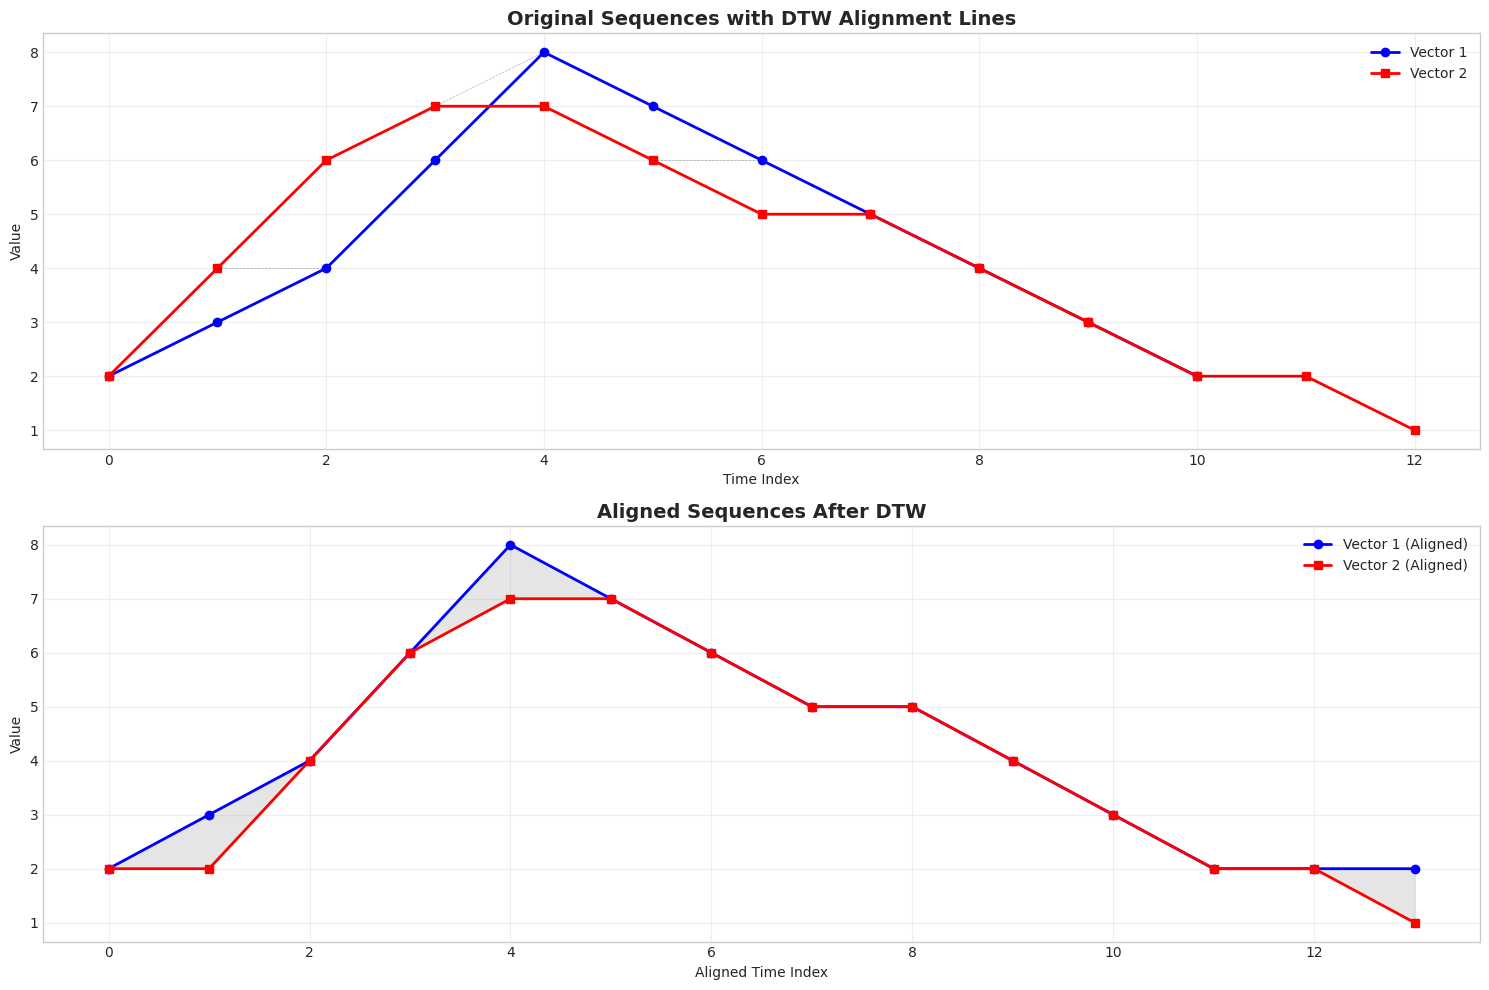

In [8]:
# Block 8: Visualize the aligned sequences
def plot_aligned_sequences(vector1, vector2, warping_path):
    """Plot the aligned sequences using the warping path"""
    
    # Create aligned sequences
    aligned_vec1 = [vector1[i] for i, j in warping_path]
    aligned_vec2 = [vector2[j] for i, j in warping_path]
    aligned_time = range(len(warping_path))
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
    
    # Plot 1: Original sequences with alignment lines
    ax1.plot(vector1, 'o-', linewidth=2, markersize=6, label='Vector 1', color='blue')
    ax1.plot(vector2, 's-', linewidth=2, markersize=6, label='Vector 2', color='red')
    
    # Draw alignment lines
    for (i, j) in warping_path[::2]:  # Draw every other line to avoid clutter
        ax1.plot([i, j], [vector1[i], vector2[j]], 'k--', alpha=0.3, linewidth=0.5)
    
    ax1.set_title('Original Sequences with DTW Alignment Lines', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Time Index')
    ax1.set_ylabel('Value')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Aligned sequences
    ax2.plot(aligned_time, aligned_vec1, 'o-', linewidth=2, markersize=6, 
             label='Vector 1 (Aligned)', color='blue')
    ax2.plot(aligned_time, aligned_vec2, 's-', linewidth=2, markersize=6, 
             label='Vector 2 (Aligned)', color='red')
    ax2.fill_between(aligned_time, aligned_vec1, aligned_vec2, alpha=0.2, color='gray')
    
    ax2.set_title('Aligned Sequences After DTW', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Aligned Time Index')
    ax2.set_ylabel('Value')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return aligned_vec1, aligned_vec2

print("Visualizing aligned sequences...")
aligned_vec1, aligned_vec2 = plot_aligned_sequences(vector1, vector2, warping_path)

In [9]:
# Block 9: Comprehensive analysis and metrics
def analyze_warping_path(warping_path, vector1, vector2):
    """Analyze the warping path characteristics"""
    
    diagonal_moves = 0
    horizontal_moves = 0
    vertical_moves = 0
    
    for i in range(1, len(warping_path)):
        prev_i, prev_j = warping_path[i-1]
        curr_i, curr_j = warping_path[i]
        
        if curr_i == prev_i + 1 and curr_j == prev_j + 1:
            diagonal_moves += 1
        elif curr_i == prev_i + 1:
            vertical_moves += 1
        else:
            horizontal_moves += 1
    
    compression_ratio = len(warping_path) / max(len(vector1), len(vector2))
    
    return {
        'total_moves': len(warping_path) - 1,
        'diagonal_moves': diagonal_moves,
        'horizontal_moves': horizontal_moves,
        'vertical_moves': vertical_moves,
        'compression_ratio': compression_ratio
    }

# Perform analysis
path_analysis = analyze_warping_path(warping_path, vector1, vector2)

print("\n🔍 Warping Path Analysis:")
print("=" * 35)
print(f"Total moves in path: {path_analysis['total_moves']}")
print(f"Diagonal moves (match): {path_analysis['diagonal_moves']}")
print(f"Horizontal moves (deletion): {path_analysis['horizontal_moves']}")
print(f"Vertical moves (insertion): {path_analysis['vertical_moves']}")
print(f"Path compression ratio: {path_analysis['compression_ratio']:.3f}")

# Calculate additional similarity metrics
from scipy.spatial.distance import euclidean
from scipy.stats import pearsonr

euclidean_dist = euclidean(vector1, vector2[:len(vector1)])  # Truncated comparison
correlation, _ = pearsonr(vector1, vector2[:len(vector1)])

print(f"\n📈 Additional Similarity Metrics:")
print(f"Euclidean distance (truncated): {euclidean_dist:.4f}")
print(f"Pearson correlation (truncated): {correlation:.4f}")
print(f"DTW distance: {dtw_dist:.4f}")
print(f"Normalized DTW distance: {dtw_dist/len(warping_path):.4f}")


🔍 Warping Path Analysis:
Total moves in path: 13
Diagonal moves (match): 9
Horizontal moves (deletion): 3
Vertical moves (insertion): 1
Path compression ratio: 1.077

📈 Additional Similarity Metrics:
Euclidean distance (truncated): 3.0000
Pearson correlation (truncated): 0.8839
DTW distance: 3.0000
Normalized DTW distance: 0.2143


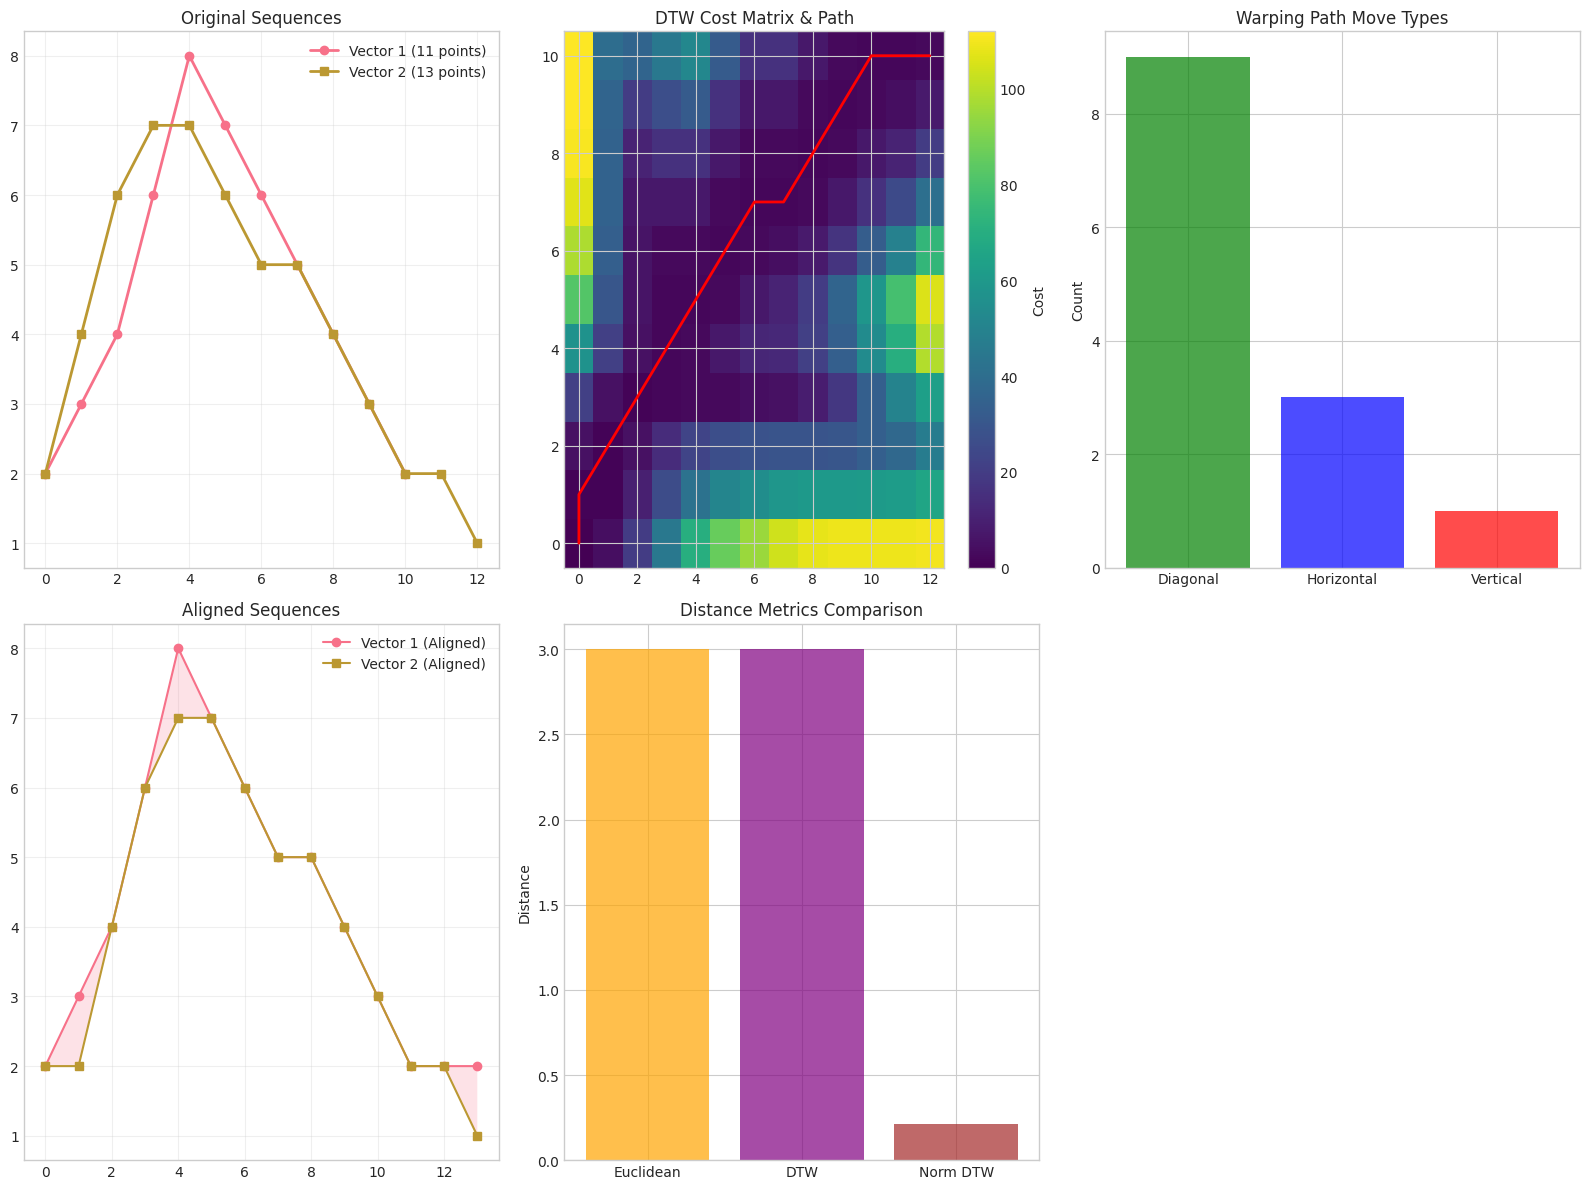


📝 DTW INFERENCE AND CONCLUSIONS

1. DTW ALGORITHM IMPLEMENTATION:
   • Successfully implemented DTW with O(n*m) time complexity
   • Computed accumulated cost matrix of size 11×13
   • Found optimal warping path with 14 alignment points

2. WARPING PATH ANALYSIS:
   • The path shows non-linear alignment between sequences
   • 9 diagonal moves indicate direct temporal matches
   • 3 horizontal moves compress Vector 2
   • 1 vertical moves stretch Vector 2
   • Path compression ratio: 1.077

3. DTW DISTANCE INTERPRETATION:
   • Raw DTW distance: 3.0000
   • Normalized DTW distance: 0.2143
   • Compared to Euclidean distance: 3.0000
   • Lower DTW distance indicates higher similarity despite temporal distortions

4. TEMPORAL ALIGNMENT INSIGHTS:
   • Vector 2 is longer and has different local timing
   • DTW successfully handles the length mismatch
   • The warping path shows where one sequence needs to be stretched/compressed
   • Similar patterns are aligned despite different speaking r

In [11]:
# Block 10: Final comprehensive visualization and inference
plt.figure(figsize=(16, 12))

# Summary visualization
plt.subplot(2, 3, 1)
plt.plot(vector1, 'o-', label=f'Vector 1 ({len(vector1)} points)', linewidth=2)
plt.plot(vector2, 's-', label=f'Vector 2 ({len(vector2)} points)', linewidth=2)
plt.title('Original Sequences')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 2)
plt.imshow(cost_matrix, cmap='viridis', aspect='auto', origin='lower')
plt.plot([p[1] for p in warping_path], [p[0] for p in warping_path], 'r-', linewidth=2)
plt.colorbar(label='Cost')
plt.title('DTW Cost Matrix & Path')

plt.subplot(2, 3, 3)
move_types = ['Diagonal', 'Horizontal', 'Vertical']
move_counts = [path_analysis['diagonal_moves'], 
               path_analysis['horizontal_moves'], 
               path_analysis['vertical_moves']]
colors = ['green', 'blue', 'red']
plt.bar(move_types, move_counts, color=colors, alpha=0.7)
plt.title('Warping Path Move Types')
plt.ylabel('Count')

plt.subplot(2, 3, 4)
aligned_time = range(len(warping_path))
plt.plot(aligned_time, aligned_vec1, 'o-', label='Vector 1 (Aligned)')
plt.plot(aligned_time, aligned_vec2, 's-', label='Vector 2 (Aligned)')
plt.fill_between(aligned_time, aligned_vec1, aligned_vec2, alpha=0.2)
plt.title('Aligned Sequences')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 5)
distance_metrics = ['Euclidean', 'DTW', 'Norm DTW']
distance_values = [euclidean_dist, dtw_dist, dtw_dist/len(warping_path)]
plt.bar(distance_metrics, distance_values, color=['orange', 'purple', 'brown'], alpha=0.7)
plt.title('Distance Metrics Comparison')
plt.ylabel('Distance')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("📝 DTW INFERENCE AND CONCLUSIONS")
print("="*80)

print(f"""
1. DTW ALGORITHM IMPLEMENTATION:
   • Successfully implemented DTW with O(n*m) time complexity
   • Computed accumulated cost matrix of size {len(vector1)}×{len(vector2)}
   • Found optimal warping path with {len(warping_path)} alignment points

2. WARPING PATH ANALYSIS:
   • The path shows non-linear alignment between sequences
   • {path_analysis['diagonal_moves']} diagonal moves indicate direct temporal matches
   • {path_analysis['horizontal_moves']} horizontal moves compress Vector 2
   • {path_analysis['vertical_moves']} vertical moves stretch Vector 2
   • Path compression ratio: {path_analysis['compression_ratio']:.3f}

3. DTW DISTANCE INTERPRETATION:
   • Raw DTW distance: {dtw_dist:.4f}
   • Normalized DTW distance: {dtw_dist/len(warping_path):.4f}
   • Compared to Euclidean distance: {euclidean_dist:.4f}
   • Lower DTW distance indicates higher similarity despite temporal distortions

4. TEMPORAL ALIGNMENT INSIGHTS:
   • Vector 2 is longer and has different local timing
   • DTW successfully handles the length mismatch
   • The warping path shows where one sequence needs to be stretched/compressed
   • Similar patterns are aligned despite different speaking rates

5. PRACTICAL SIGNIFICANCE:
   • Essential for speech recognition with variable speaking speeds
   • Useful in time series analysis and pattern recognition
   • More robust than linear methods for real-world temporal variations

6. COMPARISON WITH LINEAR METHODS:
   • Linear time normalization would fail to capture local timing variations
   • DTW provides optimal non-linear alignment
   • Handles both global and local temporal distortions effectively
""")

print("="*80)